In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
MSFT= pd.read_csv("/content/gdrive/MyDrive/DS 340W/Final Research Paper/Datasets/MSFT_5Y.csv")
MSFT = MSFT.dropna()
MSFT = MSFT[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-22,64.120003,65.139999,64.120003,65.029999,60.704510,20680000
1,2017-03-23,64.940002,65.239998,64.769997,64.870003,60.555168,19269200
2,2017-03-24,65.360001,65.449997,64.760002,64.980003,60.657841,22617100
3,2017-03-27,64.629997,65.220001,64.349998,65.099998,60.769852,18614700
4,2017-03-28,64.959999,65.470001,64.650002,65.290001,60.947208,20080400


In [ ]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,164.691716,166.286172,162.990596,164.732931,161.568068,2.916815e+07
std,78.722584,79.508143,77.871641,78.735539,79.894714,1.305268e+07
min,64.120003,65.139999,64.120003,64.870003,60.555168,7.425600e+06
25%,99.944999,101.055001,98.940002,100.485001,96.501305,2.081585e+07
50%,138.970001,139.990005,137.000000,138.429993,135.080719,2.587430e+07
75%,220.009995,223.000000,217.284996,219.660004,217.246002,3.345830e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.112421e+08


In [ ]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
pip install chart_studio

     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=68c7bca6d318ac2d30d902416b5346537c3e8449381b542b551e26327843fb0c
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
layout = go.Layout(
    title='STOCK PRICE OF MSFT',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
MSFT_DATA = [{'x':MSFT['Date'], 'y':MSFT['Close']}]
plot = go.Figure(data=MSFT_DATA, layout=layout)

In [ ]:
iplot(plot)

In [ ]:
MSFT['Open-Close']= MSFT.Close - MSFT.Open
MSFT['High-Low']  = MSFT.High - MSFT.Low
MSFT = MSFT.dropna()
X= MSFT[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,0.909996,1.019996
1,-0.069999,0.470001
2,-0.379998,0.689995
3,0.470001,0.870003
4,0.330002,0.819999


In [ ]:
Y= np.where(MSFT['Close'].shift(-1)>MSFT['Close'],1,-1)

In [ ]:

split_percentage = 0.8
split = int(split_percentage*len(MSFT))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, Y, cv=10))

In [ ]:
print(scores[0])

[0.49206349 0.52380952 0.47619048 0.42857143 0.43650794 0.47619048
 0.49206349 0.5        0.42063492 0.512     ]


In [ ]:
print(scores[1])

[0.49206349 0.51587302 0.45238095 0.44444444 0.5        0.5
 0.47619048 0.52380952 0.48412698 0.504     ]


In [ ]:
rfc = RandomForestClassifier(n_estimators=16)

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.46      0.47      0.46       124
           1       0.48      0.47      0.47       128

    accuracy                           0.47       252
   macro avg       0.47      0.47      0.47       252
weighted avg       0.47      0.47      0.47       252



In [ ]:
print(confusion_matrix(Y_test, rfc_pred))

[[58 66]
 [68 60]]


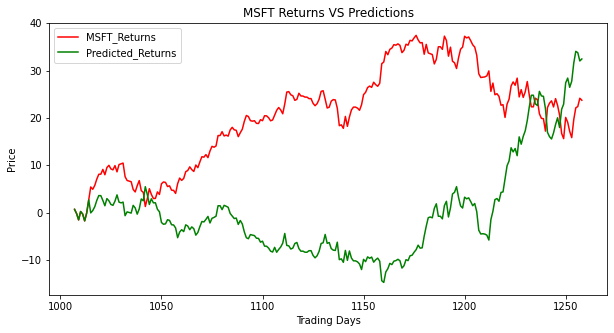

In [ ]:
MSFT['Predicted_Signal'] = rfc.predict(X)

MSFT['MSFT_returns'] = np.log(MSFT['Close']/MSFT['Close'].shift(1))
Cumulative_SPY_returns = MSFT[split:]['MSFT_returns'].cumsum()*100
 
MSFT['Strategy_returns'] = MSFT['MSFT_returns']* MSFT['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = MSFT[split:]['Strategy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'MSFT_Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Predicted_Returns')
plt.legend()
plt.title("MSFT Returns VS Predictions")
plt.xlabel("Trading Days")
plt.ylabel("Price")
plt.show()

In [ ]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -1.98


In [ ]:
model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.0625 0.9375]
 [0.1875 0.8125]
 [0.125  0.875 ]
 [0.3125 0.6875]
 [0.4375 0.5625]
 [0.     1.    ]
 [0.1875 0.8125]
 [0.9375 0.0625]
 [0.75   0.25  ]
 [0.4375 0.5625]
 [0.4375 0.5625]
 [0.4375 0.5625]
 [0.9375 0.0625]
 [0.875  0.125 ]
 [0.4375 0.5625]
 [0.4375 0.5625]
 [0.5625 0.4375]
 [0.3125 0.6875]
 [0.25   0.75  ]
 [0.25   0.75  ]
 [0.5    0.5   ]
 [0.5625 0.4375]
 [0.5    0.5   ]
 [0.3125 0.6875]
 [0.4375 0.5625]
 [0.8125 0.1875]
 [0.3125 0.6875]
 [0.4375 0.5625]
 [0.625  0.375 ]
 [0.3125 0.6875]
 [0.6875 0.3125]
 [0.3125 0.6875]
 [0.5625 0.4375]
 [0.25   0.75  ]
 [0.6875 0.3125]
 [0.8125 0.1875]
 [0.875  0.125 ]
 [0.6875 0.3125]
 [0.375  0.625 ]
 [0.4375 0.5625]
 [0.875  0.125 ]
 [0.4375 0.5625]
 [0.8125 0.1875]
 [0.875  0.125 ]
 [0.8125 0.1875]
 [0.875  0.125 ]
 [0.75   0.25  ]
 [0.0625 0.9375]
 [0.     1.    ]
 [0.1875 0.8125]
 [0.625  0.375 ]
 [0.4375 0.5625]
 [0.875  0.125 ]
 [0.6875 0.3125]
 [0.3125 0.6875]
 [0.6875 0.3125]
 [0.5    0.5   ]
 [0.75   0.25  ]
 [0.     1.   

In [ ]:
predicted = rfc.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))

[[61 63]
 [62 66]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.50      0.49      0.49       124
           1       0.51      0.52      0.51       128

    accuracy                           0.50       252
   macro avg       0.50      0.50      0.50       252
weighted avg       0.50      0.50      0.50       252



In [ ]:
#print(model.score(X_train,Y_train))

In [ ]:
print(model.score(X_test,Y_test))

0.503968253968254
